## Morning practical 1 day 2

Hi there. Here, you're going to implement the sigmoid function and the cost function for logistic regression, before running the algorithm on a test dataset

In [12]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
from numpy.random import default_rng
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import seaborn as sns
from IPython.display import display, Markdown



## Making and plotting the sigmoid function

As a first exercise, do the following:
* implement the sigmoid function. Note that $e^x$ is `np.exp(x)` in Numpy.
* get 100 numbers from a normal distribution `rng = default_rng() ; vals = rng.standard_normal(100)`
* apply your sigmoid function to these 100 values
* plot the sigmoid outputs on the y axis and the original values on the x-axis

Plotting hints:
* start a new plot with `fig, ax = plt.subplots()`
* you can plot points with `ax.scatter(xData, yData, colour= "red", label = "WowCoolMan")`
* you can label the x- and y-axis with `ax.set_xlabel("Banana"); ax.set_ylabel("Happiness level")`
* add a legend with `ax.legend()` (wait for it ....dary)
* once you are done plotting, you need to run `fig.show()`

<ipython-input-2-2103d9107481>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


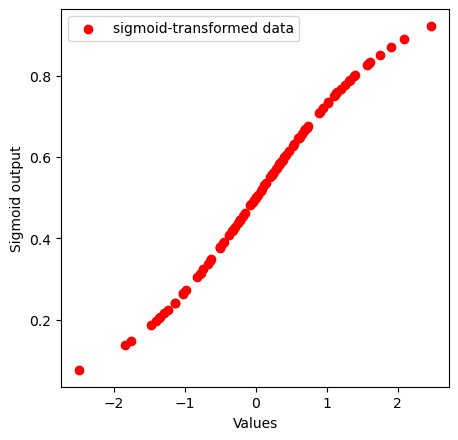

In [2]:

#answer
def mySigmoid(data):
    output = 1/(1+ np.exp(-data))
    return output
    
rng           = default_rng()
vals          = rng.standard_normal(100)
sigmoidValues = mySigmoid(vals)

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))
ax.scatter(vals, sigmoidValues, color = "red", label = "sigmoid-transformed data")
ax.set_xlabel("Values")
ax.set_ylabel("Sigmoid output")
ax.legend()
fig.show()

## Assigning a class

Let's have these random numbers stand in for real output from logistic regression. Say we want to classify samples as 1 if they have >= 80% chance of being positive, whereas we want to classify all other samples as negative. Up to you to make it happen!

* Get an array of predicted class membership based on your numpy output. Call it `predictedClass`.
* Change your plotting code to:
    * colour the points by their assigned class (use two scatter calls with different labels)
    * add a vertical dashed line where we've placed our threshold (you'll probably need [this](https://stackoverflow.com/a/68087129))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0.]


<ipython-input-3-5aa69a17b539>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


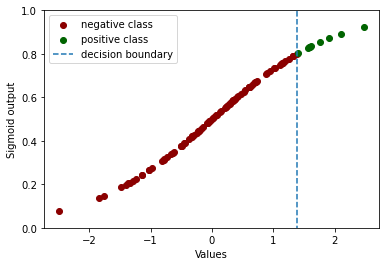

In [3]:
#answer 
predictedClass = np.zeros_like(sigmoidValues)
predictedClass[sigmoidValues >= 0.8] = 1.
print(predictedClass)

#plotting

thresholdXLocation = np.log(0.8/(1-0.8))

fig, ax = plt.subplots()
ax.scatter(vals[np.where(predictedClass == 0)], sigmoidValues[np.where(predictedClass == 0)],
           color = "darkred", label = "negative class")
ax.scatter(vals[np.where(predictedClass == 1)], sigmoidValues[np.where(predictedClass == 1)],
           color = "darkgreen", label = "positive class")
ax.set_xlabel("Values")
ax.set_ylabel("Sigmoid output")
ax.set_ylim([0, 1])
ax.vlines(thresholdXLocation, -0.2, 1.2, linestyle = "dashed", label = "decision boundary")
ax.legend()
fig.show()


## Running logistic regression

To run logistic regression, we'll need to do a few things:
* Make a function called `linAlgLogRegHypothesis` that internally runs `linAlgRegHypothesis` and then uses the sigmoid function on those outputs and returns this.
* Define a new cost function `costFuncLogReg`.
* Change gradient descent to allow it to select the hypothesis function it uses.

First make `linAlgLogRegHypothesis`. Then, make a new cost function `costFunctionLogisticRegression`. It should implement the formula: <br> <br>$$Cost(x) = -y \cdot log(h_\theta(x))- (1-y) \cdot log(1-h_\theta(x))$$ <br> with $$h_\theta(x) = sigmoid(\theta^T \cdot x)$$
<br>
Note that it should work with arrays, i.e. y is a column vector of 0 or 1, and x is an array with samples on the rows and their features in the columns. Use `np.nansum` rather than `np.sum`: once a sample is classified completely correctly, 


In [122]:
def linAlgRegHypothesis(data, thetas):
    #print(thetas)
    data = np.array(data)
    oneFeatToAdd = np.ones(len(data))
    newFeatArray = np.c_[oneFeatToAdd, data]
    #print(thetas)
    #print(newFeatArray)
    #make sure thetas are always of the form np.array([[theta1], [theta2]]), i.e. column vector
    if thetas.ndim < 2:
        thetas = thetas[:, np.newaxis]
    predictions = newFeatArray @ thetas
    #print(newFeatArray)
    #print(thetas)
    return predictions

#answer 

def linAlgLogRegHypothesis(data, thetas):
    output = mySigmoid(linAlgRegHypothesis(data, thetas))
    return output


def costFuncLogReg(x, y, thetas):
    predictions      = linAlgLogRegHypothesis(x, thetas)
    costsPerSample   = -y * np.log(predictions) - (1-y) * np.log(1 - predictions)
    totalCosts       = np.nansum(1/len(x) * costsPerSample)
    return totalCosts

## Quick test of your functions
Run the below cell to check that everything works. The output of your function for the first sample should be equal to a manual calculation of the cost for that sample. If not, something is awry and you need to check!

In [5]:
#test your function
labels = predictedClass[:, np.newaxis]
values = vals[:, np.newaxis]
thetas = np.array([0.2, 3])
result = costFuncLogReg(values, labels, thetas)
print("Cost for 100 samples when using parameters: " + str(thetas))
display(result)
print(result.shape)
#compare it to a manual calculation:
#prediction
manualHypothesis = mySigmoid(thetas[0] * 1 + thetas[1] * values[0])
#print(manualHypothesis)
#y
#print(labels[0])
#cost
#print(-labels[0] * np.log(manualHypothesis) - (1-labels[0]) * np.log(1-manualHypothesis))
#print(result[0] == -labels[0] * np.log(manualHypothesis) - (1-labels[0]) * np.log(1-manualHypothesis))

Cost for 100 samples when using parameters: [0.2 3. ]


1.2046652757350005

()


## Using gradient descent for your logistic regression

Nearly there, we just need to change the gradient descent function from yesterday to use logistic regression for prediction rather than linear regression. We'll do that by adding a call to `globals()` so the same gradient descent function can handle linear and logistic regression. A copy of the gradient descent function from yesterday is provided below. Your job is to add an extra argument `hypothesis = 'linAlgLogRegHypothesis'` that can be set to the name of a hypothesis function you've defined, and make sure the function uses that using `globals()`

The image below is a derivation showing that the gradient of the logistic regression cost function is the same as that of linear regression, and that it is convex. Extra information for those who are wondering why, you can skip it!
![LogRegGradientDerivation](WhyLogRegGradEqual.png)

In [6]:
def linAlgGradientDescent(x, y, thetas, alpha) :
    m = len(x)
    if thetas.ndim < 2:
        thetas = thetas[:, np.newaxis]
    preds  = linAlgRegHypothesis(x, thetas)
    if preds.shape != (m, 1):
        preds  = preds[:, np.newaxis]
    if y.ndim < 2:
        y = y[:, np.newaxis]
    errors = preds - y
    gradientSummation  = errors.T @ np.c_[np.ones(len(errors)), x]
    finalGradientSteps = alpha/m * gradientSummation
    newThetas          = thetas - finalGradientSteps.T
    return newThetas

#answer

def linAlgGradientDescent(x, y, thetas, alpha, hypothesis = "linAlgLogRegHypothesis") :
    m = len(x)
    if thetas.ndim < 2:
        thetas = thetas[:, np.newaxis]
    preds  = globals()[hypothesis](x, thetas)
    if preds.shape != (m, 1):
        preds  = preds[:, np.newaxis]
    if y.ndim < 2:
        y = y[:, np.newaxis]
    errors = preds - y
    #print(errors)
    #print(errors.T)
    #print(np.c_[np.ones(len(errors)), x])
    gradientSummation  = errors.T @ np.c_[np.ones(len(errors)), x]
    #print(gradientSummation)
    finalGradientSteps = alpha/m * gradientSummation
    #print(finalGradientSteps)
    newThetas          = thetas - finalGradientSteps.T
    return newThetas

## Testing your gradient descent function

The below puts your function to the test. We assume that the predictedClass you made earlier (where you used 100 random normally distributed values, put them into the sigmoid, and assigned the 20% highest values as 1 and the rest as 0) are the true labels. We start from random thetas, update them by gradient descent, and look whether the predicted class indeed moves towards the actual signal (decision threshold) that is present in the data.

After looking at the images, answer the following question: 
* Why is there still a cost when all predictions are correct? How is that possible?


<ipython-input-7-bec6d897de43>:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


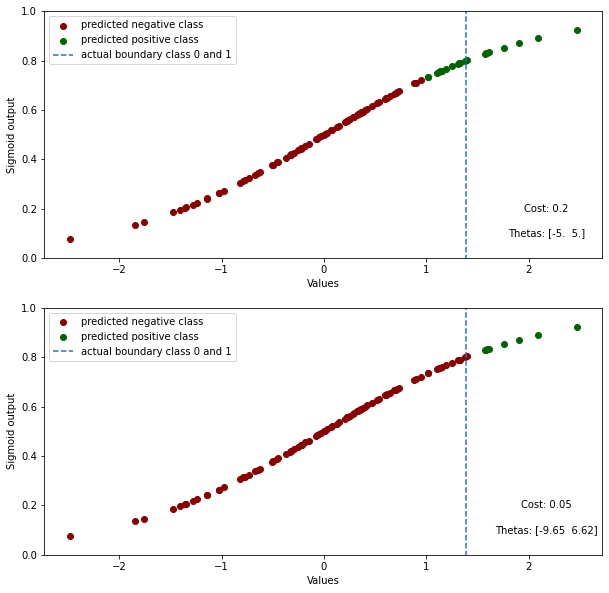

In [7]:
labels = predictedClass[:, np.newaxis]
values = vals[:, np.newaxis]
thetas = np.array([[-5.0], [5.0]])
alpha = 0.8
stepsToTake = 1000

thetasAlongDescent = []
thetasAlongDescent.append(thetas)
costAlongDescent   = []
for gradientDescentStep in range(0, stepsToTake):
    costNow   = costFuncLogReg(values, labels, thetasAlongDescent[-1])
    costAlongDescent.append(costNow)
    newThetas = linAlgGradientDescent(values, labels, thetasAlongDescent[-1], alpha)
    thetasAlongDescent.append(newThetas)
    
#Plot the predictions for the untrained model and the trained model using a threshold of 0.5 (50%)

fig, ax = plt.subplots(2, 1, figsize = (10,10))

initialPredictions = linAlgLogRegHypothesis(values, thetas)
initialClassPred   = np.where(initialPredictions<=0.5,0,1)
finalPredictions   = linAlgLogRegHypothesis(values, thetasAlongDescent[-1])
finalClassPred     = np.where(finalPredictions<=0.5,0,1)
sigmoidValues      = mySigmoid(values)

ax[0].scatter(vals[np.where(np.ravel(initialClassPred) == 0)],
              sigmoidValues[np.where(np.ravel(initialClassPred) == 0)],
              color = "darkred", label = "predicted negative class")
ax[0].scatter(vals[np.where(np.ravel(initialClassPred) == 1)],
              sigmoidValues[np.where(np.ravel(initialClassPred) == 1)],
              color = "darkgreen", label = "predicted positive class")
ax[0].set_xlabel("Values")
ax[0].set_ylabel("Sigmoid output")
ax[0].vlines(thresholdXLocation, -0.2, 1.2, linestyle = "dashed", label = "actual boundary class 0 and 1")
ax[0].set_ylim([0, 1])
ax[0].legend()

ax[0].text(0.9, 0.2, 'Cost: ' + str(np.round(np.sum(costAlongDescent[0]), 2)), horizontalalignment='center', 
                                    verticalalignment='center', transform=ax[0].transAxes)
ax[0].text(0.9, 0.1, 'Thetas: ' + str(np.ravel(thetas)), horizontalalignment='center', 
                                    verticalalignment='center', transform=ax[0].transAxes)

ax[1].scatter(vals[np.where(np.ravel(finalClassPred) == 0)],
              sigmoidValues[np.where(np.ravel(finalClassPred) == 0)],
              color = "darkred", label = "predicted negative class")
ax[1].scatter(vals[np.where(np.ravel(finalClassPred) == 1)],
              sigmoidValues[np.where(np.ravel(finalClassPred) == 1)],
              color = "darkgreen", label = "predicted positive class")
ax[1].set_xlabel("Values")
ax[1].set_ylabel("Sigmoid output")
ax[1].vlines(thresholdXLocation, -0.2, 1.2, linestyle = "dashed", label = "actual boundary class 0 and 1")
ax[1].set_ylim([0, 1])
ax[1].legend()

ax[1].text(0.9, 0.2, 'Cost: ' + str(np.round(np.sum(costAlongDescent[-1]), 2)), horizontalalignment='center',
    verticalalignment='center', transform=ax[1].transAxes)
ax[1].text(0.9, 0.1, 'Thetas: ' + str(np.ravel(np.round(thetasAlongDescent[-1], 2))), horizontalalignment='center', 
                                    verticalalignment='center', transform=ax[1].transAxes)

fig.show()

## Plotting parameter changes along gradient descent
Let's plot how the parameters of our linear regression change along gradient descent:

Initial cost: 0.20237539067264357
Final cost: 0.050187628886829136


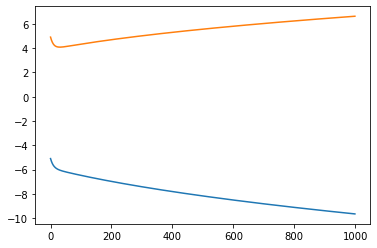

In [145]:
thetaTimeCourse = np.hstack(thetasAlongDescent)

figTheta, axTheta = plt.subplots()
axTheta.plot(range(0, stepsToTake), thetaTimeCourse[0,1:], label = "Theta0")
axTheta.plot(range(0, stepsToTake), thetaTimeCourse[1,1:], label = "Theta1")

print("Initial cost: " + str(costAlongDescent[0]))
print("Final cost: " + str(costAlongDescent[-1]))

## Other optimisation algorithms

Gradient descent is one way to get the minimum of a function, but it is certainly not the only one. You might have noticed that we ran it for a thousand iterations above and it moved slowly. This is because the gradients become very small when the predictions are almost correct (if your hypothesis predicts 0.00 but it should be 0 exactly, you can see how that would lead to exceedingly small steps to correct this). Therefore, we might wish to turn to other optimisation methods. There are many other ones that incorporate all sorts of smart tricks. Those of you who've followed the BiBC Essentials Course should remember some of them! Here, you're going to optimise logistic regression not using simple gradient descent, but one of the more involved optimisers. We won't go into how they work (that's a numerical mathematics course in its own right), just know that they are faster and will require inputs in a slightly different form. You need to:

* Skim [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html) and try to understand what the first 4 arguments mean.
* You'll need to supply this advanced optimisation algorithm with 1: the function to optimise, and 2. (optionally, but we will do it) its derivative(s).
* To do that:
    1. Make a copy of the gradient descent function, with the following arguments: `linAlgGradient(thetas, x, y, hypothesis = 'linAlgLogRegHypothesis')`. The reordering of the arguments is because fmin_bfgs wants the first argument of each function to be its parameters (thetas). This copy should not return the new thetas (as in our normal gradient descent function) but just the array of gradients (partial derivatives) of the cost function. Hence this function doesn't need an alpha parameter. Make sure to wrap the returned values in `np.ravel()` so they are in the dimension fmin_bfgs wants.
    2. The function to optimise is the cost function. Make a copy of it that has the thetas as its first arguments `costFuncLogReg2(thetas, x, y)`.
* Once that's done, run the code cell below it to see the resulting thetas.

In [110]:
#answer 
def linAlgGradient(thetas, x, y, hypothesis = "linAlgLogRegHypothesis") :
    m = len(x)
    if thetas.ndim < 2:
        print(thetas)
        thetas = thetas[:, np.newaxis]
    preds  = globals()[hypothesis](x, thetas)
    if preds.shape != (m, 1):
        preds  = preds[:, np.newaxis]
    if y.ndim < 2:
        y = y[:, np.newaxis]
    errors = preds - y
    gradientSummation  = 1/m * errors.T @ np.c_[np.ones(len(errors)), x]
    return np.ravel(gradientSummation)

def costFuncLogReg2(thetas, x, y):
    predictions = linAlgLogRegHypothesis(x, thetas)
    costs       = np.nansum(1/len(x) * (-y * np.log(predictions) - (1-y) * np.log(1 - predictions)))
    return costs

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36


<ipython-input-44-5f23ce9a4a15>:17: RuntimeWarning: divide by zero encountered in log
  costs       = np.nansum(1/len(x) * (-y * np.log(predictions) - (1-y) * np.log(1 - predictions)))
<ipython-input-44-5f23ce9a4a15>:17: RuntimeWarning: invalid value encountered in multiply
  costs       = np.nansum(1/len(x) * (-y * np.log(predictions) - (1-y) * np.log(1 - predictions)))
<ipython-input-2-2103d9107481>:3: RuntimeWarning: overflow encountered in exp
  output = 1/(1+ np.exp(-data))
<ipython-input-4-e3fae83c3038>:23: RuntimeWarning: divide by zero encountered in log
  costsPerSample   = -y * np.log(predictions) - (1-y) * np.log(1 - predictions)
<ipython-input-4-e3fae83c3038>:23: RuntimeWarning: invalid value encountered in multiply
  costsPerSample   = -y * np.log(predictions) - (1-y) * np.log(1 - predictions)


(-0.1, 0.1)

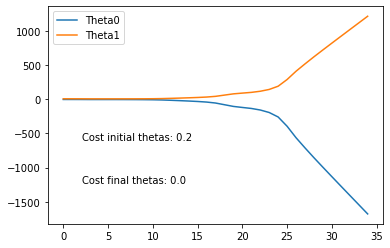

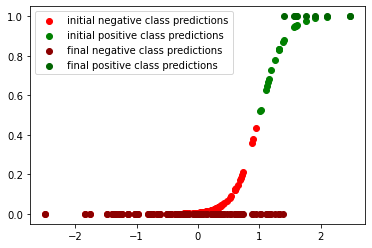

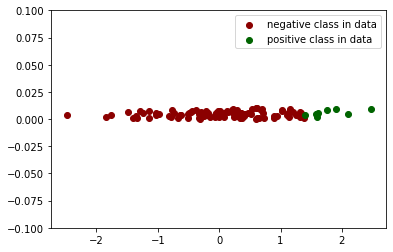

In [49]:
#setting the values
from scipy.optimize import fmin_bfgs
labels = predictedClass[:, np.newaxis]
values = vals[:, np.newaxis]
thetas = np.array([[-5.], [5.]])

#final function call

optimisedOutput = fmin_bfgs(costFuncLogReg2, thetas, linAlgGradient, (values, labels), retall = True)
finalThetas     = optimisedOutput[0]


#plotting

figThetaBFGS, axThetaBFGS = plt.subplots()
axThetaBFGS.plot(range(0, len(optimisedOutput[1])), list(zip(*optimisedOutput[1]))[0], label = "Theta0")
axThetaBFGS.plot(range(0, len(optimisedOutput[1])), list(zip(*optimisedOutput[1]))[1], label = "Theta1")
axThetaBFGS.text(0.1, 0.4, 'Cost initial thetas: ' + str(np.round(costFuncLogReg(values, labels, thetas), 2)),
    verticalalignment='center', transform=axThetaBFGS.transAxes)
axThetaBFGS.text(0.1, 0.2, 'Cost final thetas: ' + str(np.round(costFuncLogReg(values, labels, finalThetas), 2)),
    verticalalignment='center', transform=axThetaBFGS.transAxes)
axThetaBFGS.legend()

#plotting
fig, ax = plt.subplots()
initialPredictions = np.ravel(linAlgLogRegHypothesis(values, thetas))
finalPredictions   = np.ravel(linAlgLogRegHypothesis(values, finalThetas))
initialClasses     = np.where(initialPredictions<=0.5,0,1)
finalClasses       = np.where(finalPredictions<=0.5,0,1)

ax.scatter(values[np.where(initialClasses == 0)], initialPredictions[np.where(initialClasses == 0)],
                           color = "red", label = "initial negative class predictions")
ax.scatter(values[np.where(initialClasses == 1)], initialPredictions[np.where(initialClasses == 1)],
                           color = "green", label = "initial positive class predictions")

ax.scatter(values[np.where(finalClasses == 0)], finalPredictions[np.where(finalClasses == 0)],
                           color = "darkred", label = "final negative class predictions")
ax.scatter(values[np.where(finalClasses == 1)], finalPredictions[np.where(finalClasses == 1)],
                           color = "darkgreen", label = "final positive class predictions")
ax.legend()

classMemberShipFig, classMemberShipAx = plt.subplots()
randomYPositions = rng.random(len(labels)) * 0.01
classMemberShipAx.scatter(values[np.where(labels == 0)], randomYPositions[np.where(np.ravel(labels) == 0)],
                          color = 'darkred', label = "negative class in data")
classMemberShipAx.scatter(values[np.where(labels == 1)], randomYPositions[np.where(np.ravel(labels) == 1)],
                          color = 'darkgreen', label = "positive class in data")
classMemberShipAx.legend()
classMemberShipAx.set_ylim((-0.1,0.1))

## Conclusion BFGS optimisation

You see that the optimal situation (when we don't consider generalisation) is to simply parameterise the sigmoid function such that it become a so-called step function: <div>
<img src="Dirac_distribution_CDF.svg" width="500"/>
</div>
at exactly the point where the class shifts from 0 to 1. You see that all the predictions before this threshold are (up to some numerical precision) 0, and all the ones after it are 1. To get this step function you need rather extreme values for $\theta_0$ and $\theta_1$. With gradient descent it would have taken ages to find them, with BFGS it's rather quick. Note that the warnings are because certain values, when exponentiated, become np.nan (too large or too small to hold in a floating point value) and because log(0) is -Inf. In the end, these values are ignored due to `np.nansum` and the -Inf values are also not tallied. Hence, nothing to worry about.

## Working with more features

Until now we've worked with just one feature, which is somewhat unfulfilling. Let's change to two features and see what happens then.

Text(0, 0.5, 'Feature 2')

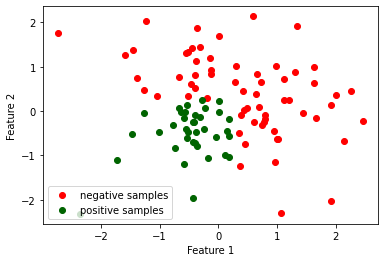

In [127]:
randomFeat1, randomFeat2 = rng.standard_normal(100), rng.standard_normal(100)
labels = np.logical_and(randomFeat1 <= 0.25,randomFeat2 <= 0.25).astype(int)

plt.scatter(randomFeat1[labels == 0], randomFeat2[labels == 0], color = "red", label = "negative samples")
plt.scatter(randomFeat1[labels == 1], randomFeat2[labels == 1], color = "darkgreen",
            label = "positive samples")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


## Calculating the decision boundary
Up to you to:
* Calculate the cost for the initial thetas
* Optimise the thetas using BFGS
* Plot the decision boundary and the total cost before and after optimisation (helpful code provided)

0.7798350621156293
Optimization terminated successfully.
         Current function value: 0.302765
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19


(-3.0, 3.0)

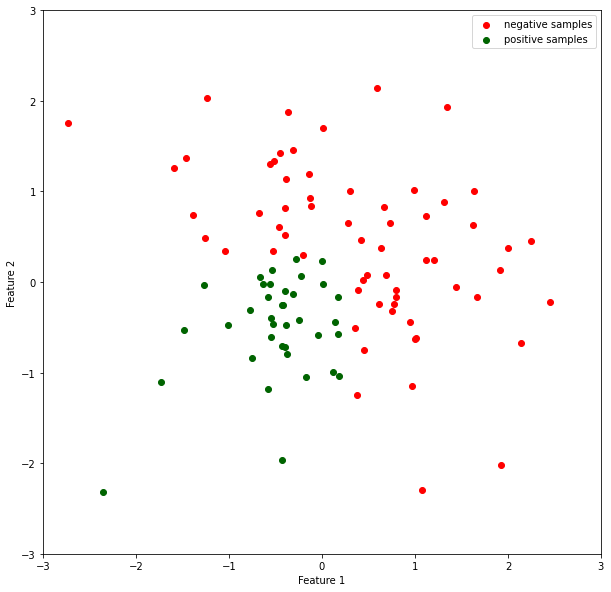

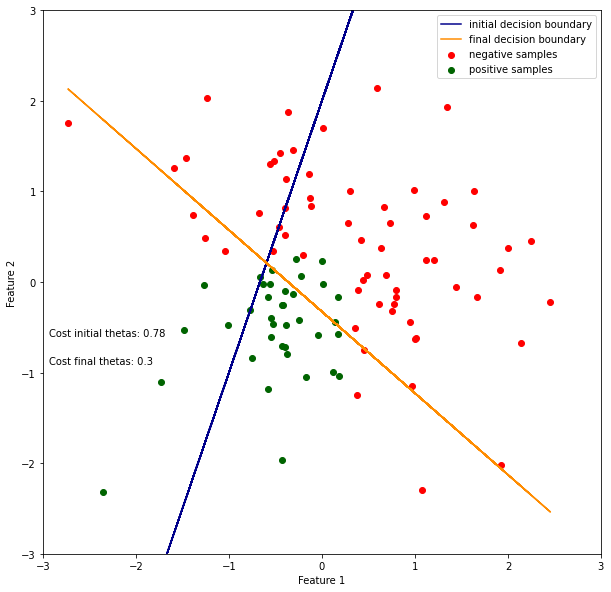

In [144]:
initialThetas = np.array([[0.2], [0.3], [-0.1]])
features = np.hstack([randomFeat1[:, np.newaxis], randomFeat2[:, np.newaxis]])
twoDLabels = np.squeeze(labels)[:, np.newaxis]

#your code here







#helpful for plotting
def getDecisionBoundaryYValues(feat1, thetas):
    """Returns the y values for a decision boundary based on thetas for a 2D logistic regression problem"""
    thetas = np.ravel(thetas)
    b, w1, w2 = thetas
    intercept = -b/w2
    gradient  = -w1/w2
    yValues   = gradient * feat1 + intercept
    return yValues

#plot set-up
finalFig, finalAx = plt.subplots(figsize=(10,10))
finalAx.scatter(randomFeat1[labels == 0], randomFeat2[labels == 0], color = "red", label = "negative samples")
finalAx.scatter(randomFeat1[labels == 1], randomFeat2[labels == 1], color = "darkgreen",
            label = "positive samples")

#Up to you to add the decision boundary lines!

finalAx.legend()
finalAx.set_xlabel("Feature 1")
finalAx.set_ylabel("Feature 2")
finalAx.set_ylim(-3,3)
finalAx.set_xlim(-3,3)


#answer
initialCost = costFuncLogReg(features, twoDLabels, initialThetas)
print(initialCost)

optimisedThetas = fmin_bfgs(costFuncLogReg2, initialThetas, linAlgGradient, (features, twoDLabels), retall = True)
finalThetas     = optimisedThetas[0]
initialBoundary = getDecisionBoundaryYValues(randomFeat1, initialThetas)
finalBoundary   = getDecisionBoundaryYValues(randomFeat1, finalThetas)
finalCost       = costFuncLogReg(features, twoDLabels, finalThetas)

finalFig, finalAx = plt.subplots(figsize=(10,10))
finalAx.scatter(randomFeat1[labels == 0], randomFeat2[labels == 0], color = "red", label = "negative samples")
finalAx.scatter(randomFeat1[labels == 1], randomFeat2[labels == 1], color = "darkgreen",
            label = "positive samples")
finalAx.plot(randomFeat1, initialBoundary, color = "darkblue", label="initial decision boundary")
finalAx.plot(randomFeat1, finalBoundary, color = "darkorange", label="final decision boundary")
finalAx.text(0.01, 0.4, 'Cost initial thetas: ' + str(np.round(initialCost, 2)), transform = finalAx.transAxes)
finalAx.text(0.01, 0.35, 'Cost final thetas: ' + str(np.round(finalCost, 2)), transform = finalAx.transAxes)
finalAx.legend()
finalAx.set_xlabel("Feature 1")
finalAx.set_ylabel("Feature 2")
finalAx.set_ylim(-3,3)
finalAx.set_xlim(-3,3)





## The end

Congratulations, you've implemented logistic regression, both using gradient descent and using a more advanced optimisation algorithm. You might feel that you don't know what the heck BFGS is doing, and that's fine: the modern ML libraries you'll use when applying your knowledge to (biological) problems use appropriate optimisation methods behind the scenes, or if you need to select them manually you can simply test and see which works best. The thing you should remember is that if gradients get small, gradient descent can progress extremely slowly. 

